## Data ingestion

In [77]:
#importación de librerías
import pandas as pd # para manejo de datos
import numpy as np #para manejo de matrices y vectores
import plotly.express as px # gráficos
import plotly.graph_objs as go # gráficos
import seaborn as sns # gráficos
from sklearn.impute import SimpleImputer # para imputación
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [3]:
### Cargar tablas de datos desde github ###
retirement_info ='https://raw.githubusercontent.com/jhansanchez/casome/main/datos/retirement_info.csv'
general_data= 'https://raw.githubusercontent.com/jhansanchez/casome/main/datos/general_data.csv'
employee_survey_data ='https://raw.githubusercontent.com/jhansanchez/casome/main/datos/employee_survey_data.csv'
out_time = 'https://raw.githubusercontent.com/jhansanchez/casome/main/datos/out_time.csv'
in_time = 'https://raw.githubusercontent.com/jhansanchez/casome/main/datos/in_time.csv'
manager_survey_data ='https://raw.githubusercontent.com/jhansanchez/casome/main/datos/manager_survey_data.csv'

In [4]:
df_general = pd.read_csv(general_data) # datos generales de los empleados
df_manager_s = pd.read_csv(manager_survey_data) #encuesta del gerente de desempeño de los empleados
df_retirement = pd.read_csv(retirement_info) # información de empleados que se retiran de la empresa
df_employee_s = pd.read_csv(employee_survey_data) # encuesta de los empleados nivel de satisfacción laboral
#df_in= pd.read_csv(in_time) # el horario de ingreso de cada empleado
#df_out= pd.read_csv(out_time) # el horario de salida de cada empleado 

Exploración de las bases de datos

In [151]:
df_general.head(5)	

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,NumCompaniesWorked,TotalWorkingYears
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,11,0,6,1,0,0,1,1.0
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,Research Scientist,Single,41890,23,1,3,5,1,4,0,6.0
2,32,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,Sales Executive,Married,193280,15,3,2,5,0,3,1,5.0
3,38,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,Human Resources,Married,83210,11,3,5,8,7,5,3,13.0
4,32,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,Sales Executive,Single,23420,12,2,2,6,0,4,4,9.0


In [5]:
df_manager_s.head(5)


,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [6]:
df_employee_s.head(5)

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [7]:
df_retirement.head(5)

,EmployeeID,Attrition,retirementDate,retirementType,resignationReason
0,2,Yes,15/10/2016,Resignation,Others
1,7,Yes,20/7/2016,Resignation,Stress
2,14,Yes,8/11/2016,Resignation,Others
3,29,Yes,15/10/2016,Resignation,Others
4,31,Yes,8/2/2016,Resignation,Salary


In [8]:
#df_in


In [9]:
#df_out.head(5)

## Comprensión y limpieza de datos

 En este sección de exploran las bases de datos de una forma más detallada, adiconalmente se realizará la eliminación de variables necearias, tratamiento de datos nulos, homologación de variables y cambio de tipo de variable. 

### 1.  'df_general' = datos generales de los empleados 

In [10]:
df_general.head(5)

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,...,4.0,Y,12,8,2,9.0,2,6,0,4


#### 1.1 Eliminación de variables 

In [11]:
#eliminar las variables "EmployeeCount", "Over18" y "StandardHours"
#"EmployeeCount": la variable solo cuenta con una categoría, siendo el valor de 1, se encuentra que no aporta información significativa en el estudio. 
#"Over18": la variable solo cuenta con una categoría, siendo el valor de "Y", se encuentra que no aporta informacion significativa debido a que todas las personas de la empresa son mayores de edad.
#"StandardHours":  la variable solo cuenta con una categoría, siendo el valor de 8, se encuentra que no aporta informacion significativa debido a que todas las personas trabajan 8 horas al día.
df_general = df_general.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis = 1) #Eliminación de variables 

#### 1.2 Tratamiento de datos nulos

In [12]:
df_general.info() #De las 23 variables, solo dos presentan datos nulos y tipo de variable mal asignado, siendo estas: "NumCompaniesWorked", "TotalWorkingYears"
#"NumCompaniesWorked" = 19 nulos, tipo de variable asignado= float, tipo de variable correcto = int 
#"TotalWorkingYears" = 9 nulos, tipo de variable asignado= float, tipo de variable correcto = int 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   BusinessTravel           4410 non-null   object 
 2   Department               4410 non-null   object 
 3   DistanceFromHome         4410 non-null   int64  
 4   Education                4410 non-null   int64  
 5   EducationField           4410 non-null   object 
 6   EmployeeID               4410 non-null   int64  
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4391 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

In [13]:
df_general.columns #visualizar todas las columnas

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeID', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [14]:
df_general[df_general['NumCompaniesWorked'].isnull()] #filtrar las filas que tienen nulos en la variable "NumCompaniesWorked"

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
115,27,Travel_Rarely,Sales,2,3,Life Sciences,116,Male,1,Sales Executive,Divorced,23670,NaN,12,1,5.0,2,5,0,4
210,52,Travel_Rarely,Sales,2,1,Medical,211,Male,1,Laboratory Technician,Divorced,99800,NaN,11,1,18.0,2,10,6,9
343,40,Travel_Frequently,Sales,9,3,Marketing,344,Male,3,Manufacturing Director,Single,22380,NaN,14,0,10.0,3,1,0,0
476,22,Travel_Rarely,Research & Development,8,3,Other,477,Male,2,Sales Representative,Married,49070,NaN,21,1,4.0,2,4,1,1
647,29,Travel_Rarely,Research & Development,3,3,Technical Degree,648,Female,2,Healthcare Representative,Divorced,48050,NaN,16,1,9.0,2,7,1,7
799,29,Travel_Frequently,Research & Development,28,3,Medical,800,Female,5,Research Scientist,Single,44340,NaN,17,3,7.0,1,5,0,0
932,32,Travel_Rarely,Research & Development,5,4,Technical Degree,933,Male,5,Research Scientist,Divorced,50030,NaN,13,0,10.0,5,9,1,6
1103,26,Travel_Frequently,Sales,16,2,Life Sciences,1104,Male,2,Healthcare Representative,Married,83800,NaN,14,0,8.0,3,7,7,7
1312,37,Travel_Rarely,Human Resources,9,3,Human Resources,1313,Male,2,Healthcare Representative,Divorced,54840,NaN,17,0,7.0,4,3,0,2
1521,31,Travel_Rarely,Research & Development,20,1,Technical Degree,1522,Female,3,Research Scientist,Married,99070,NaN,13,1,6.0,3,5,0,3


In [15]:
#conocer el porcentaje de nulos de la variable 'NumCompaniesWorked'
round(df_general['NumCompaniesWorked'].isnull().sum()/df_general['NumCompaniesWorked'].size, 6)*100 

0.4308

In [16]:
df_general[df_general['TotalWorkingYears'].isnull()] #filtrar las filas que tienen nulos en la variable "TotalWorkingYears"

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
23,42,Travel_Rarely,Research & Development,4,4,Life Sciences,24,Male,1,Manufacturing Director,Married,89260,1.0,14,0,NaN,4,20,11,6
137,43,Travel_Frequently,Sales,14,3,Life Sciences,138,Female,1,Manufacturing Director,Married,37480,7.0,14,2,NaN,3,3,1,2
308,47,Travel_Frequently,Research & Development,4,3,Life Sciences,309,Male,1,Research Director,Single,27740,4.0,13,1,NaN,2,5,1,3
574,37,Travel_Rarely,Research & Development,23,3,Life Sciences,575,Male,3,Manufacturing Director,Divorced,166590,7.0,16,1,NaN,2,6,1,3
1517,36,Non-Travel,Research & Development,5,4,Life Sciences,1518,Male,1,Sales Executive,Married,85780,7.0,21,0,NaN,4,9,0,8
2367,39,Travel_Rarely,Sales,2,4,Life Sciences,2368,Male,1,Laboratory Technician,Divorced,72640,0.0,17,0,NaN,5,10,0,7
3120,35,Travel_Rarely,Research & Development,12,2,Medical,3121,Female,2,Sales Representative,Married,28090,4.0,23,1,NaN,2,8,0,0
3818,28,Travel_Rarely,Human Resources,1,3,Medical,3819,Female,2,Laboratory Technician,Married,24130,1.0,16,1,NaN,2,1,0,0
4409,40,Travel_Rarely,Research & Development,28,3,Medical,4410,Male,2,Laboratory Technician,Divorced,54680,0.0,12,0,NaN,6,21,3,9


In [17]:
df_general['TotalWorkingYears'].value_counts().head(5)

10.0    605
6.0     375
8.0     307
9.0     287
5.0     264
Name: TotalWorkingYears, dtype: int64

In [18]:
#conocer el porcentaje de nulos de la variable "TotalWorkingYears"
round(df_general['TotalWorkingYears'].isnull().sum()/df_general['TotalWorkingYears'].size, 6)*100 

0.20409999999999998

A pesar de que las dos variables que tienen nulos en esta base de datos, no son valores muy elevados:

'TotalWorkingYears' = 0.2%
'NumCompaniesWorked' = 0.4%

No se eliminaran estos registros, debido a que por si la base de datos no contiene muchos datos, lo que generaría a futuro que los modelos predictivos que se construyan, posiblemente no cuenten con la suficiente información para un buen entrenamiento. Por consiguiente, a continuación se muestra como se imputaran los valores nulos de las dos variables.

In [19]:
# Para la variable'NumCompaniesWorked', se aplicara la imputación del valor que más se repite, siendo este valor de 1
# es decir, que de las 19 personas que no se tiene información del número de empresas en las que ha trabajado se pondrá 1
df_general['NumCompaniesWorked'].value_counts()

1.0    1558
0.0     586
3.0     474
2.0     438
4.0     415
7.0     222
6.0     208
5.0     187
9.0     156
8.0     147
Name: NumCompaniesWorked, dtype: int64

In [20]:
df_n=df_general[['NumCompaniesWorked']] #Filtrar la variable a imputar 
imputer_n=SimpleImputer(strategy='most_frequent') #Llamar la técnica de imputación
imputer_n.fit(df_n) 
X_n=imputer_n.transform(df_n)
df_n=pd.DataFrame(X_n,columns=df_n.columns) # Convertir a DataFrame
df_general = df_general.drop(['NumCompaniesWorked'], axis = 1) # Eliminar la variable con nulos
df_general =pd.concat([df_general,df_n],axis=1) #Unir la variable imputada con el resto de variables

In [21]:
df_general['TotalWorkingYears'].value_counts() #Analizar que método de imputación aplicar

10.0    605
6.0     375
8.0     307
9.0     287
5.0     264
7.0     243
1.0     242
4.0     189
12.0    144
3.0     126
15.0    120
16.0    111
13.0    108
11.0    106
21.0    102
17.0     99
14.0     93
2.0      93
20.0     89
18.0     81
23.0     66
19.0     66
22.0     62
24.0     54
25.0     42
26.0     42
28.0     42
0.0      33
29.0     30
31.0     27
32.0     27
27.0     21
30.0     21
33.0     21
36.0     18
34.0     15
37.0     12
35.0      9
40.0      6
38.0      3
Name: TotalWorkingYears, dtype: int64

In [22]:
# Para la variable'TotalWorkingYears', se aplicara la imputación de la mediana, siendo este valor de 10 
# es decir, que de las 9 personas que no se tiene información del total de años trabajados se pondrá 10 años
df_general['TotalWorkingYears'].median()

10.0

In [44]:
df_t=df_general[['TotalWorkingYears']] #Filtrar la variable a imputar 
imputer_t=SimpleImputer(strategy='median') #Llamar la técnica de imputación
imputer_t.fit(df_t) 
X_t=imputer_t.transform(df_t)
df_t=pd.DataFrame(X_t,columns=df_t.columns) # Convertir a DataFrame
df_general = df_general.drop(['TotalWorkingYears'], axis = 1) # Eliminar la variable con nulos
df_general =pd.concat([df_general,df_t],axis=1) #Unir la variable imputada con el resto de variables

In [24]:
df_general.isnull().sum() # Comprobar la no existencia de nulos

Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
PercentSalaryHike          0
StockOptionLevel           0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
NumCompaniesWorked         0
TotalWorkingYears          0
dtype: int64

#### 1.3 Verificación de homologación de variables

In [25]:

obj = (df_general.dtypes == object) #Filtrar variables categóricas
obj_cols = [c for c in obj.index if obj[c]] 
df_general_obj = df_general[obj_cols]

In [26]:
lista = df_general_obj.columns
for i in lista:
    print(i)
    print(df_general[i].value_counts())
    print('______________________________________________________')

BusinessTravel
Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: BusinessTravel, dtype: int64
______________________________________________________
Department
Research & Development    2883
Sales                     1338
Human Resources            189
Name: Department, dtype: int64
______________________________________________________
EducationField
Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: EducationField, dtype: int64
______________________________________________________
Gender
Male      2646
Female    1764
Name: Gender, dtype: int64
______________________________________________________
JobRole
Sales Executive              978
Research Scientist           876
Laboratory Technician        777
Manufacturing Director       435
Healthcare Representative    393
Manager                      306
Sales Representative         249
Research Direc

In [27]:
lista = [ 'JobRole', 'MaritalStatus']
for i in lista:
    print(i)
    print(df_general_obj[i].value_counts())
    print('______________________________________________________')

JobRole
Sales Executive              978
Research Scientist           876
Laboratory Technician        777
Manufacturing Director       435
Healthcare Representative    393
Manager                      306
Sales Representative         249
Research Director            240
Human Resources              156
Name: JobRole, dtype: int64
______________________________________________________
MaritalStatus
Married     2019
Single      1410
Divorced     981
Name: MaritalStatus, dtype: int64
______________________________________________________


In [28]:
df_general['StockOptionLevel'].value_counts() #Se comprobó que no hay variables que necesiten homologación

0    1893
1    1788
2     474
3     255
Name: StockOptionLevel, dtype: int64

#### 1.4 Verificación del tipo de variable

In [29]:
#Comprobar la correcta asignación de tipo de variable, donde se encuentra dos:
#'NumCompaniesWorked' -> tipo de variable asignado= float, tipo de variable correcto = int 
#'TotalWorkingYears' ->  tipo de variable asignado= float, tipo de variable correcto = int 
df_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   BusinessTravel           4410 non-null   object 
 2   Department               4410 non-null   object 
 3   DistanceFromHome         4410 non-null   int64  
 4   Education                4410 non-null   int64  
 5   EducationField           4410 non-null   object 
 6   EmployeeID               4410 non-null   int64  
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  PercentSalaryHike        4410 non-null   int64  
 13  StockOptionLevel         4410 non-null   int64  
 14  TrainingTimesLastYear   

In [30]:
#Cambio tipo de variable 
df_general= df_general.astype({'TotalWorkingYears' : int, 'NumCompaniesWorked' : int })

### 2. 'df_manager_s' = encuesta al gerente sobre los empleados


 #### 2.1 Eliminación de variables

In [31]:
df_manager_s.head(5) #No es necesario eliminar ninguna variable

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


#### 2.2 Tratamiento de datos nulos

In [32]:
df_manager_s.info() # No hay nulos y el tipo de variable esta bien asignado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


#### 2.3 Verificación de homologación de variables

In [51]:
#Conocer cuantas y cuales categorías existen en la base df_employee_s, además el numero de datos por categoría
lista = [ 'JobInvolvement', 'PerformanceRating']
for i in lista:
    print(i)
    print(df_manager_s[i].value_counts())
    print('______________________________________________________')

JobInvolvement
3    2604
2    1125
4     432
1     249
Name: JobInvolvement, dtype: int64
______________________________________________________
PerformanceRating
3    3732
4     678
Name: PerformanceRating, dtype: int64
______________________________________________________


Se comprobó que no hay variables que necesiten homologación

#### 2.4 Verificación del tipo de variable

In [35]:
df_manager_s.info() #todas las variables tienen asignada correctamente el tipo de variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


Nota: no fue necesario hacer ningún tipo de modificación en esta base de datos

### 3. df_employee_s' = encuesta a los empleados sobre satisfacción laboral 

 #### 3.1 Eliminación de variables

In [84]:
df_employee_s.head(5) # No es necesario eliminar ninguna variable

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


#### 3.2 Tratamiento de datos nulos

In [85]:
df_employee_s.info() 
# Hay nulos en las 3 de las 4 variables de la base de datos, siendo estas: "EnvironmentSatisfaction", "JobSatisfaction", "WorkLifeBalance"
#"EnvironmentSatisfaction" = 25 nulos
#"JobSatisfaction" = 20 nulos
#"WorkLifeBalance" = 38 nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [86]:
df_employee_s.isnull().sum() #total de nulos por variable

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

In [ ]:
df_employee_s[df_employee_s['EnvironmentSatisfaction'].isnull()] #filtrar las filas que tienen nulos en la variable "EnvironmentSatisfaction"

In [ ]:
df_employee_s[df_employee_s['JobSatisfaction'].isnull()] #filtrar las filas que tienen nulos en la variable "JobSatisfaction"

In [ ]:
df_employee_s[df_employee_s['WorkLifeBalance'].isnull()] #filtrar las filas que tienen nulos en la variable "WorkLifeBalance "

Nota: todos los los nulos existentes se encuentran en registros diferentes, por lo que en total se tienen 88 nulos en entradas de registro diferentes

In [41]:
round(df_employee_s.isnull().sum()/df_employee_s.size, 6)*100 #conocer el porcentaje de nulos de las variables

EmployeeID                 0.0000
EnvironmentSatisfaction    0.1417
JobSatisfaction            0.1134
WorkLifeBalance            0.2154
dtype: float64

A pesar de que las dos variables que tienen nulos en esta base de datos, no son valores muy elevados

No se eliminaran estos registros, por las razones expuestas en el tratamiento de datos nulos de la base 'df_general'. Por consiguiente, a continuación se muestra como se imputaran los valores nulos de las tres variables.

In [45]:
lista = [ 'EnvironmentSatisfaction', 'JobSatisfaction','WorkLifeBalance'] #Conocer la media de las variables
for i in lista:
    print(i)
    print(df_employee_s[i].median())
    print('______________________________________________________')


EnvironmentSatisfaction
3.0
______________________________________________________
JobSatisfaction
3.0
______________________________________________________
WorkLifeBalance
3.0
______________________________________________________


Al ser la mediana la misma para las tres variables se decide llenar los nulos con el valor de '3'

In [47]:
df_employee_s = df_employee_s.fillna(3) #Llenar todos los nulos con la mediana

In [48]:
df_employee_s.info() # no hay existencia de nulos 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   JobSatisfaction          4410 non-null   float64
 2   WorkLifeBalance          4410 non-null   float64
 3   EnvironmentSatisfaction  4410 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


#### 3.3 Verificación de homologación de variables

In [50]:
lista = [ 'JobSatisfaction', 'WorkLifeBalance','EnvironmentSatisfaction'] #Conocer cuantas y cuales categorías existen en la base df_employee_s, además el numero de datos por categoría
for i in lista:
    print(i)
    print(df_employee_s[i].value_counts())
    print('______________________________________________________')

JobSatisfaction
4.0    1367
3.0    1343
1.0     860
2.0     840
Name: JobSatisfaction, dtype: int64
______________________________________________________
WorkLifeBalance
3.0    2698
2.0    1019
4.0     454
1.0     239
Name: WorkLifeBalance, dtype: int64
______________________________________________________
EnvironmentSatisfaction
3.0    1375
4.0    1334
2.0     856
1.0     845
Name: EnvironmentSatisfaction, dtype: int64
______________________________________________________


No es necesario hacer alguna modificación con relación a las categorías de las variables

#### 3.4 Verificación del tipo de variable

In [52]:
#Comprobar la correcta asignación de tipo de variable, donde se encuentra tres variables con mala asignación:
#'JobSatisfaction' -> tipo de variable asignado= float, tipo de variable correcto = int 
#'WorkLifeBalance' ->  tipo de variable asignado= float, tipo de variable correcto = int 
#'EnvironmentSatisfaction' ->  tipo de variable asignado= float, tipo de variable correcto = int 
df_employee_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   JobSatisfaction          4410 non-null   float64
 2   WorkLifeBalance          4410 non-null   float64
 3   EnvironmentSatisfaction  4410 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [55]:
#Cambio tipo de variable 
df_employee_s= df_employee_s.astype({'EnvironmentSatisfaction' : int, 'JobSatisfaction' : int, 'WorkLifeBalance' : int })

### 4. 'df_retirement' =  empleados retirados de la empresa


 #### 4.1 Eliminación de variables

In [68]:
df_retirement.head(5) # no es necesario eliminar ninguna variable

,EmployeeID,Attrition,retirementDate,retirementType,resignationReason
0,2,Yes,2016-10-15,Resignation,Others
1,7,Yes,2016-07-20,Resignation,Stress
2,14,Yes,2016-08-11,Resignation,Others
3,29,Yes,2016-10-15,Resignation,Others
4,31,Yes,2016-08-02,Resignation,Salary


#### 4.2 Tratamiento de datos nulos

In [36]:
df_retirement.info() #existen datos nulos en la variable 'resignationReason' = razones de renuncia

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   EmployeeID         711 non-null    int64 
 1   Attrition          711 non-null    object
 2   retirementDate     711 non-null    object
 3   retirementType     711 non-null    object
 4   resignationReason  641 non-null    object
dtypes: int64(1), object(4)
memory usage: 27.9+ KB


In [58]:
df_retirement.isnull().sum() #70 nulos en dicha variable

EmployeeID            0
Attrition             0
retirementDate        0
retirementType        0
resignationReason    70
dtype: int64

In [59]:
#se llenan los datos nulos con una nueva categoría llamada "no information"
df_retirement['resignationReason']= df_retirement['resignationReason'].fillna('No information')

#### 4.3 Verificación de homologación de variables

In [61]:
#Conocer cuantas y cuales categorías existen en la base df_retirement, además el numero de datos por categoría
lista = [ 'Attrition', 'retirementType', 'resignationReason']
for i in lista:
    print(i)
    print(df_retirement[i].value_counts())
    print('______________________________________________________')

Attrition
Yes    711
Name: Attrition, dtype: int64
______________________________________________________
retirementType
Resignation    641
Fired           70
Name: retirementType, dtype: int64
______________________________________________________
resignationReason
Others            323
Salary            189
Stress            129
No information     70
Name: resignationReason, dtype: int64
______________________________________________________


No es necesario hacer ninguna homologación 

#### 4.4 Verificación del tipo de variable

In [67]:
#Comprobar la correcta asignación de tipo de variable, donde se encuentra una variable con mala asignación:
#'retirementDate ' -> tipo de variable asignado= object, tipo de variable correcto =  
 
df_retirement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   EmployeeID         711 non-null    int64         
 1   Attrition          711 non-null    object        
 2   retirementDate     711 non-null    datetime64[ns]
 3   retirementType     711 non-null    object        
 4   resignationReason  711 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 27.9+ KB


In [ ]:
df_retirement['retirementDate'] = pd.to_datetime(df_retirement['retirementDate']) #asignar tipo de variable de fehca 

### 5. "in_time" y 6. "out_time" 
    Nota: no se tendrán en cuenta estas bases de datos debido a que no se encontrarón relvantes para el estudio. 

## Análisis exploratorio

In [115]:
#¿Cuáles son los puntajes promedio de la encuesta de empleados que se retiraron?
df = pd.merge(df_retirement, df_employee_s, how = 'left', on = 'EmployeeID')
df.describe().drop('EmployeeID', axis = 1)

,JobSatisfaction,WorkLifeBalance,EnvironmentSatisfaction
count,711.000000,711.000000,711.000000
mean,2.471167,2.662447,2.472574
std,1.115296,0.814471,1.163540
min,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000
50%,3.000000,3.000000,3.000000
75%,3.000000,3.000000,4.000000
max,4.000000,4.000000,4.000000


In [116]:
#¿Cuáles son los puntajes promedio de la encuesta de empleados que aún continuan en la empresa?
df5 = pd.merge(df_retirement, df_employee_s, how = 'right', on = 'EmployeeID')
df5['Attrition'] = df5['Attrition'].fillna('No')
df5[df5['Attrition'] == 'No'].describe()

,EmployeeID,JobSatisfaction,WorkLifeBalance,EnvironmentSatisfaction
count,3699.000000,3699.000000,3699.000000,3699.000000
mean,2208.139497,2.779129,2.782914,2.773723
std,1273.944391,1.088877,0.678552,1.068453
min,1.000000,1.000000,1.000000,1.000000
25%,1110.500000,2.000000,2.000000,2.000000
50%,2213.000000,3.000000,3.000000,3.000000
75%,3304.500000,4.000000,3.000000,4.000000
max,4410.000000,4.000000,4.000000,4.000000


<Figure size 1200x240 with 0 Axes>

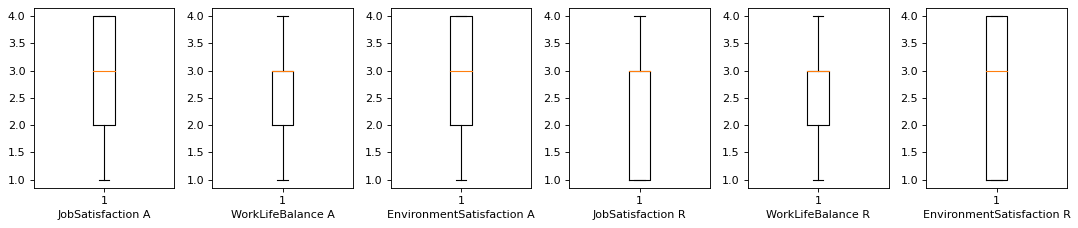

In [121]:
#¿Cómo es el comportamiento de los puntajes de la satisfacción de los empleados comparando activos y retirados, representados en un BoxPlot?
df3 = df5[df5['Attrition'] == 'No'].drop(['retirementDate', 'retirementType', 'resignationReason'], axis = 1).rename(columns= {'JobSatisfaction' : 'JobSatisfaction A', 'WorkLifeBalance' : 'WorkLifeBalance A', 'EnvironmentSatisfaction' : 'EnvironmentSatisfaction A' })
df6 = pd.merge(df3, df, how = 'outer').drop(['retirementDate', 'retirementType', 'resignationReason'], axis = 1).rename(columns= {'JobSatisfaction' : 'JobSatisfaction R', 'WorkLifeBalance' : 'WorkLifeBalance R', 'EnvironmentSatisfaction' : 'EnvironmentSatisfaction R' })
figure(figsize=(15, 3), dpi=80);

# graficar Score
figure(figsize =(18,3), dpi = 80)
j = 1
for i in df6.columns[2:]:
  plt.subplot(1,8,j)
  plt.tight_layout()
  plt.boxplot(df6[df6[i].notnull()][i])
  plt.xlabel(i)
  j = j+1;

In [ ]:
figure(figsize=(15, 3), dpi=80);

# graficar Score
figure(figsize =(18,3), dpi = 80)
j = 1
for i in df3.columns[2:]:
  plt.subplot(1,8,j)
  plt.tight_layout()
  plt.boxplot(df3[df3[i].notnull()][i])
  plt.xlabel(i)
  j = j+1;

In [41]:
#¿Cuáles son los puntajes promedio de la calificación del gerente de las personas que se retiraron?
df = pd.merge(df_retirement, df_manager_s, how = 'left', on = 'EmployeeID')
df.describe().drop('EmployeeID', axis = 1)

,JobInvolvement,PerformanceRating
count,711.000000,711.000000
mean,2.704641,3.172996
std,0.761739,0.378510
min,1.000000,3.000000
25%,2.000000,3.000000
50%,3.000000,3.000000
75%,3.000000,3.000000
max,4.000000,4.000000


In [139]:
#¿Cuál es el rol en la compañia en el que más personas se retiraron?
df_GR = pd.merge(df_retirement, df_general, how = 'left', on = 'EmployeeID')
base = df_GR.groupby(['JobRole'])[['Attrition']].count().sort_values('Attrition', ascending= False).rename(columns={'Attrition': 'TotalPeople'}).reset_index()

fig = px.bar(base, x = 'JobRole', y='TotalPeople',
             title= '<b>Job role of retired employee<b>',
             color_discrete_sequence=px.colors.qualitative.Dark2, width = 700)

fig.update_layout(
    xaxis_title = 'Job Role',
    yaxis_title = 'Total people',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

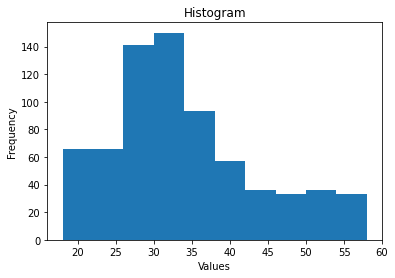

In [140]:
#¿Cómo es el histograma de la edad de las personas que se retiraron?
df_GR_groups = df_GR.copy(deep = True)
n, bins, patches=plt.hist(df_GR_groups['Age'])
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram")
plt.show()

In [141]:
df_GR_groups = df_GR_groups.astype({'Age' : int})

In [142]:
#¿Cuál es la edad en la que más personas se retiraron?
df_GR_groups['Age'] = df_GR_groups['Age'].apply(lambda x: "<21" if (x >=19) & (x <=20) else "21-25" if (x >=21) & (x <=25) else "26-30" if (x >=26) & (x <=30) else "31-35" if (x >=31) & (x <=35) else "36-40" if (x >=36) & (x <=40) else "41-45" if (x >=41) & (x <=45) else "46-50" if (x >=46) & (x <=50) else "51-55" if (x >=51) & (x <=55) else ">56")

In [143]:
df_GR_groups.groupby(['Age'])[['Attrition']].count().sort_values('Attrition', ascending= False).rename(columns={'Attrition': 'TotalPeople'}).reset_index()

,Age,TotalPeople
0,31-35,180
1,26-30,168
2,21 -25,84
3,36-40,75
4,41-45,54
5,46-50,48
6,<21,36
7,>56,36
8,51-55,30


In [44]:
#Cuál es el salario más alto de las personas que se retiraron?
df_GR_groups['MonthlyIncome'] = df_GR_groups['MonthlyIncome'].apply(lambda x: "Low" if (x >=0) & (x <=28210) else "Medium" if (x >=28211) & (x <=46800) else "Medium high" if (x >=46801) & (x <=68610) else "High" if (x >=68611) & (x <=116910) else "Very high")
df_GR_groups.groupby(['MonthlyIncome'])[['Attrition']].count().sort_values('Attrition', ascending= False).rename(columns={'Attrition': 'TotalPeople'}).reset_index()

,MonthlyIncome,TotalPeople
0,Medium high,188
1,Low,171
2,Medium,164
3,High,101
4,Very high,87


In [45]:
#¿Cuál es el salario más alto y más bajo en la empresa?
print('Salario minimo: ', df_general['MonthlyIncome'].min())
print('Salario máximo: ', df_general['MonthlyIncome'].max())

Salario minimo:  10090
Salario máximo:  199990


In [46]:
#¿Cuál es el estado civil de las personas que se retiraron?
base = df_GR.groupby(['MaritalStatus'])[['Attrition']].count().sort_values('Attrition', ascending= False).rename(columns={'Attrition': 'TotalPeople'}).reset_index()

fig = px.pie(base, values = 'TotalPeople', names= 'MaritalStatus',
             title= '<b>Marital status of retired employee<b>',
             color_discrete_sequence=px.colors.qualitative.Dark2, width=500)

fig.update_layout(
    template = 'simple_white',
    title_x = 0.5,  
    margin = dict(l= 20, r=20, b=20, t=100))

fig.show()

In [47]:
df_GR

,EmployeeID,Attrition,retirementDate,retirementType,resignationReason,Age,BusinessTravel,Department,DistanceFromHome,Education,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,2,Yes,15/10/2016,Resignation,Others,31.0,Travel_Frequently,Research & Development,10.0,1.0,...,Single,41890.0,0.0,23.0,1.0,6.0,3.0,5.0,1.0,4.0
1,7,Yes,20/7/2016,Resignation,Stress,28.0,Travel_Rarely,Research & Development,11.0,2.0,...,Single,58130.0,2.0,20.0,1.0,5.0,2.0,0.0,0.0,0.0
2,14,Yes,8/11/2016,Resignation,Others,47.0,Non-Travel,Research & Development,1.0,1.0,...,Married,57620.0,1.0,11.0,2.0,10.0,4.0,10.0,9.0,9.0
3,29,Yes,15/10/2016,Resignation,Others,44.0,Travel_Frequently,Research & Development,1.0,2.0,...,Divorced,103330.0,3.0,14.0,1.0,19.0,2.0,1.0,0.0,0.0
4,31,Yes,8/2/2016,Resignation,Salary,26.0,Travel_Rarely,Research & Development,4.0,3.0,...,Divorced,68540.0,2.0,11.0,0.0,5.0,5.0,3.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,4382,Yes,18/4/2016,Resignation,Salary,29.0,Travel_Rarely,Research & Development,7.0,1.0,...,Single,21800.0,1.0,21.0,0.0,4.0,2.0,4.0,0.0,1.0
707,4387,Yes,16/9/2016,Resignation,Others,33.0,Travel_Rarely,Sales,11.0,4.0,...,Married,71400.0,5.0,21.0,0.0,8.0,2.0,5.0,0.0,4.0
708,4389,Yes,24/5/2016,Resignation,Others,33.0,Travel_Rarely,Sales,1.0,3.0,...,Married,51470.0,7.0,11.0,0.0,13.0,2.0,9.0,1.0,7.0
709,4392,Yes,26/2/2016,Fired,No information,32.0,Travel_Rarely,Sales,23.0,1.0,...,Single,24680.0,0.0,11.0,0.0,4.0,2.0,3.0,1.0,2.0


In [48]:
#¿Cuál es el porcentaje por género de retiros según las áreas de la empresa? 
df_GRA=df_GR.groupby(['Gender','Department']) [['Attrition']].count().rename(columns={'Attrition': 'TotalPeople'}).reset_index()
df_GRA['%'] = round(df_GRA['TotalPeople']/df_GRA['TotalPeople'].sum()*100, 2)
df_GRA.drop('TotalPeople', axis=1)

,Gender,Department,%
0,Female,Human Resources,2.84
1,Female,Research & Development,25.82
2,Female,Sales,9.36
3,Male,Human Resources,4.96
4,Male,Research & Development,37.87
5,Male,Sales,19.15


In [49]:
#¿Qué tanto viajan las personas que renuncian con relación a las personas activas en la empresa?
df = df_GR.groupby(['BusinessTravel'])[['Attrition']].count().sort_values('Attrition', ascending= False).rename(columns={'Attrition': 'TotalPeople'}).reset_index()
df['% Active'] = round(df['TotalPeople']/df['TotalPeople'].sum()*100, 2)
df.drop('TotalPeople', axis = 1, inplace = True)

df2 = pd.merge(df_retirement, df_general, how = 'right', on = 'EmployeeID')
df2['Attrition'] = df2['Attrition'].fillna('No')
df2 = df2[df2['Attrition'] == 'No'].groupby(['BusinessTravel'])[['Attrition']].count().sort_values('Attrition', ascending= False).rename(columns={'Attrition': 'TotalPeople'}).reset_index()
df2['% Retired'] = round(df2['TotalPeople']/df2['TotalPeople'].sum()*100, 2)
df2.drop('TotalPeople', axis = 1, inplace = True)
pd.merge(df, df2, how='inner', on = 'BusinessTravel')

,BusinessTravel,% Active,% Retired
0,Travel_Rarely,65.96,71.91
1,Travel_Frequently,28.94,16.89
2,Non-Travel,5.11,11.20


In [50]:
#¿Cuál es el departamento con más retiros en la empresa?
base = df_GR.groupby(['Department'])[['EmployeeID']].count().sort_values('EmployeeID', ascending = False).reset_index().rename(columns = {'EmployeeID': 'Total retired employees'}).head(10)
fig = px.pie(base, values = 'Total retired employees', names ='Department',
             title= '<b>Total employee retirements by department<b>',
             color_discrete_sequence=px.colors.qualitative.Dark2, width=500)

fig.update_layout(
    xaxis_title = 'Department',
    yaxis_title = 'Total retired employees', 
    template = 'simple_white',
    title_x = 0.5, margin = dict(l= 20, r=20, b=20, t=100))

fig.show()

In [51]:
#¿Cuál es el departamento con mas retiros por renuncias y despidos en la empresa?
base = df_GR.groupby([df_GR['retirementType'], 'Department'])[['EmployeeID']].count().rename(columns = {'EmployeeID': 'Total retired employees'}).reset_index()
fig = px.sunburst(base, path=['retirementType', 'Department' ], values='Total retired employees', title= '<b>Department by retirements due to resignation and fired<b>', 
color_discrete_sequence=px.colors.qualitative.Dark2, width=600)

fig.show()

c:\Users\jhans\anaconda3\lib\site-packages\plotly\express\_core.py:1569: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\jhans\anaconda3\lib\site-packages\plotly\express\_core.py:1569: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [52]:
#¿Cuál es el porcentaje de retiros por departamento?
base['Total retired employees'] = base['Total retired employees'].apply(lambda x: "1,6%" if (x == 3) else "1,5%" if (x == 44) else "1,7%" if (x == 23)  else "27,3%" if (x == 52) else "13,9%" if (x == 405) else "13,2%" )
base = base.rename(columns= {'Total retired employees': 'TotalRetiredEmployees'})

fig = go.Figure(data=[go.Table( header=dict(values=[['<b>retirement Type</b>'],
                  ['<b>Department</b>'], ['<b>Total retired employees</b>']],
                    fill_color='#636EFA',
align='center',
                    font_size=20,
                    font_color = 'white',
                    height=25),
                    cells=dict(values=[base.retirementType, base.Department, base.TotalRetiredEmployees],
               fill_color='lavender',
               align=['center', 'center'], 
               font_size=20,
               height=40))])

fig.update_layout(width=650, height=700)
fig.show()

In [147]:
#Comportamiento de los retiros a través del tiempo en semanas
base = df_GR.groupby(['retirementDate'])[['Attrition']].count().reset_index()
base =base.resample('1W', on='retirementDate').sum().reset_index()
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=base.retirementDate,
    y=base.Attrition,
    name = 'behavior of employee retirements over time'
))
fig.update_layout(title_text='behavior of employee retirements over time', title_x=0.5, width=1200)
fig.show()

In [150]:
#Comportamiento de los retiros a través del tiempo por meses
base1 =base.resample('1M', on='retirementDate').sum().reset_index()
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=base1.retirementDate,
    y=base1.Attrition,
    name = 'behavior of employee retirements over time'
))
fig.update_layout(title_text='behavior of employee retirements over time', title_x=0.5, width=1200)
fig.show()

In [203]:
df_general1 = df_general[['Age', 'DistanceFromHome', 'EmployeeID','MonthlyIncome', 'PercentSalaryHike', 'YearsAtCompany', 'JobLevel', 'StockOptionLevel', 'TrainingTimesLastYear', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'NumCompaniesWorked', 'TotalWorkingYears'  ]]
df10 = pd.merge(df_employee_s, df_manager_s, on = 'EmployeeID', how='left')
df10 = pd.merge(df10, df_general1, on = 'EmployeeID', how='left')
df20 = pd.merge(df_retirement, df10, on = 'EmployeeID', how='left')
df20= df20.astype({'TotalWorkingYears' : int })
df40 = pd.merge(df10, df_retirement, on = 'EmployeeID', how='left')
df40 =df40.fillna('0').drop(['retirementDate', 'retirementType','resignationReason'], axis = 1)
df40['Attrition'] =df40['Attrition'].replace('Yes', 1).astype({'Attrition' : int })
df40= df40.astype({'TotalWorkingYears' : int }).drop(['EmployeeID'], axis = 1)

In [205]:
df40.corr()

,JobSatisfaction,WorkLifeBalance,EnvironmentSatisfaction,JobInvolvement,PerformanceRating,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,YearsAtCompany,JobLevel,StockOptionLevel,TrainingTimesLastYear,YearsSinceLastPromotion,YearsWithCurrManager,NumCompaniesWorked,TotalWorkingYears,Attrition
JobSatisfaction,1.000000,-0.018527,-0.006036,0.004006,0.043147,-0.003003,-0.011213,0.004716,0.030626,-0.002098,-0.018596,0.039757,-0.021522,-0.016081,-0.024653,-0.055385,-0.016703,-0.103068
WorkLifeBalance,-0.018527,1.000000,0.023769,-0.018435,-0.022920,-0.020524,0.008305,0.003705,-0.040305,0.014343,-0.027763,-0.022701,-0.014834,0.009389,0.007358,-0.008771,0.001254,-0.062975
EnvironmentSatisfaction,-0.006036,0.023769,1.000000,0.015410,0.014039,0.009699,0.020113,-0.005747,0.000850,0.000098,-0.024540,-0.004842,0.017885,0.015152,-0.006054,0.012947,-0.002433,-0.101625
JobInvolvement,0.004006,-0.018435,0.015410,1.000000,0.010699,0.018196,-0.001837,0.023346,-0.004658,0.008314,-0.012630,0.010295,-0.010144,0.025395,-0.001372,0.028082,0.006778,-0.015588
PerformanceRating,0.043147,-0.022920,0.014039,0.010699,1.000000,-0.025563,0.036418,0.016093,0.773550,-0.011038,-0.002474,-0.036348,-0.022895,-0.020159,-0.009426,0.018604,-0.001458,0.023403
Age,-0.003003,-0.020524,0.009699,0.018196,-0.025563,1.000000,0.006963,-0.044314,-0.033137,0.311309,-0.002884,-0.031753,-0.027308,0.216513,0.202089,0.299186,0.680340,-0.159205
DistanceFromHome,-0.011213,0.008305,0.020113,-0.001837,0.036418,0.006963,1.000000,-0.021607,0.038125,0.031684,-0.037329,0.011169,-0.009001,0.002290,0.021584,-0.013069,0.009314,-0.009730
MonthlyIncome,0.004716,0.003705,-0.005747,0.023346,0.016093,-0.044314,-0.021607,1.000000,0.004325,0.000995,0.047316,0.026930,0.050112,0.065219,0.024304,-0.020222,-0.033758,-0.031176
PercentSalaryHike,0.030626,-0.040305,0.000850,-0.004658,0.773550,-0.033137,0.038125,0.004325,1.000000,-0.029707,0.010973,0.012548,-0.037392,-0.029542,-0.040864,0.031383,-0.018810,0.032533
YearsAtCompany,-0.002098,0.014343,0.000098,0.008314,-0.011038,0.311309,0.031684,0.000995,-0.029707,1.000000,-0.064219,0.007886,-0.007894,0.618409,0.769212,-0.116945,0.626737,-0.134392


In [209]:
#TotalWorkingYears * Attrition = -0.170162
#Age * Attrition = -0.159205
#YearsWithCurrManager * Attrition = -0.156199
#YearsAtCompany * Attrition = -0.134392
#Attrition * JobSatisfaction = -0.103068
#EnvironmentSatisfaction * Attrition = -0.101625


df40.corr().unstack().sort_values().head(15)

TotalWorkingYears        Attrition              -0.170162
Attrition                TotalWorkingYears      -0.170162
Age                      Attrition              -0.159205
Attrition                Age                    -0.159205
YearsWithCurrManager     Attrition              -0.156199
Attrition                YearsWithCurrManager   -0.156199
                         YearsAtCompany         -0.134392
YearsAtCompany           Attrition              -0.134392
NumCompaniesWorked       YearsAtCompany         -0.116945
YearsAtCompany           NumCompaniesWorked     -0.116945
YearsWithCurrManager     NumCompaniesWorked     -0.108752
NumCompaniesWorked       YearsWithCurrManager   -0.108752
Attrition                JobSatisfaction        -0.103068
JobSatisfaction          Attrition              -0.103068
EnvironmentSatisfaction  Attrition              -0.101625
dtype: float64

In [223]:
x= df40.corr().unstack().sort_values()
x[x<1].tail(20)


Age                      NumCompaniesWorked         0.299186
NumCompaniesWorked       Age                        0.299186
YearsAtCompany           Age                        0.311309
Age                      YearsAtCompany             0.311309
YearsSinceLastPromotion  TotalWorkingYears          0.404015
TotalWorkingYears        YearsSinceLastPromotion    0.404015
                         YearsWithCurrManager       0.458403
YearsWithCurrManager     TotalWorkingYears          0.458403
                         YearsSinceLastPromotion    0.510224
YearsSinceLastPromotion  YearsWithCurrManager       0.510224
YearsAtCompany           YearsSinceLastPromotion    0.618409
YearsSinceLastPromotion  YearsAtCompany             0.618409
TotalWorkingYears        YearsAtCompany             0.626737
YearsAtCompany           TotalWorkingYears          0.626737
Age                      TotalWorkingYears          0.680340
TotalWorkingYears        Age                        0.680340
YearsAtCompany          

In [219]:
x

YearsAtCompany           TotalWorkingYears          0.626737
Age                      TotalWorkingYears          0.680340
TotalWorkingYears        Age                        0.680340
YearsAtCompany           YearsWithCurrManager       0.769212
YearsWithCurrManager     YearsAtCompany             0.769212
PerformanceRating        PercentSalaryHike          0.773550
PercentSalaryHike        PerformanceRating          0.773550
JobSatisfaction          JobSatisfaction            1.000000
NumCompaniesWorked       NumCompaniesWorked         1.000000
WorkLifeBalance          WorkLifeBalance            1.000000
EnvironmentSatisfaction  EnvironmentSatisfaction    1.000000
JobInvolvement           JobInvolvement             1.000000
PerformanceRating        PerformanceRating          1.000000
Age                      Age                        1.000000
DistanceFromHome         DistanceFromHome           1.000000
TotalWorkingYears        TotalWorkingYears          1.000000
MonthlyIncome           

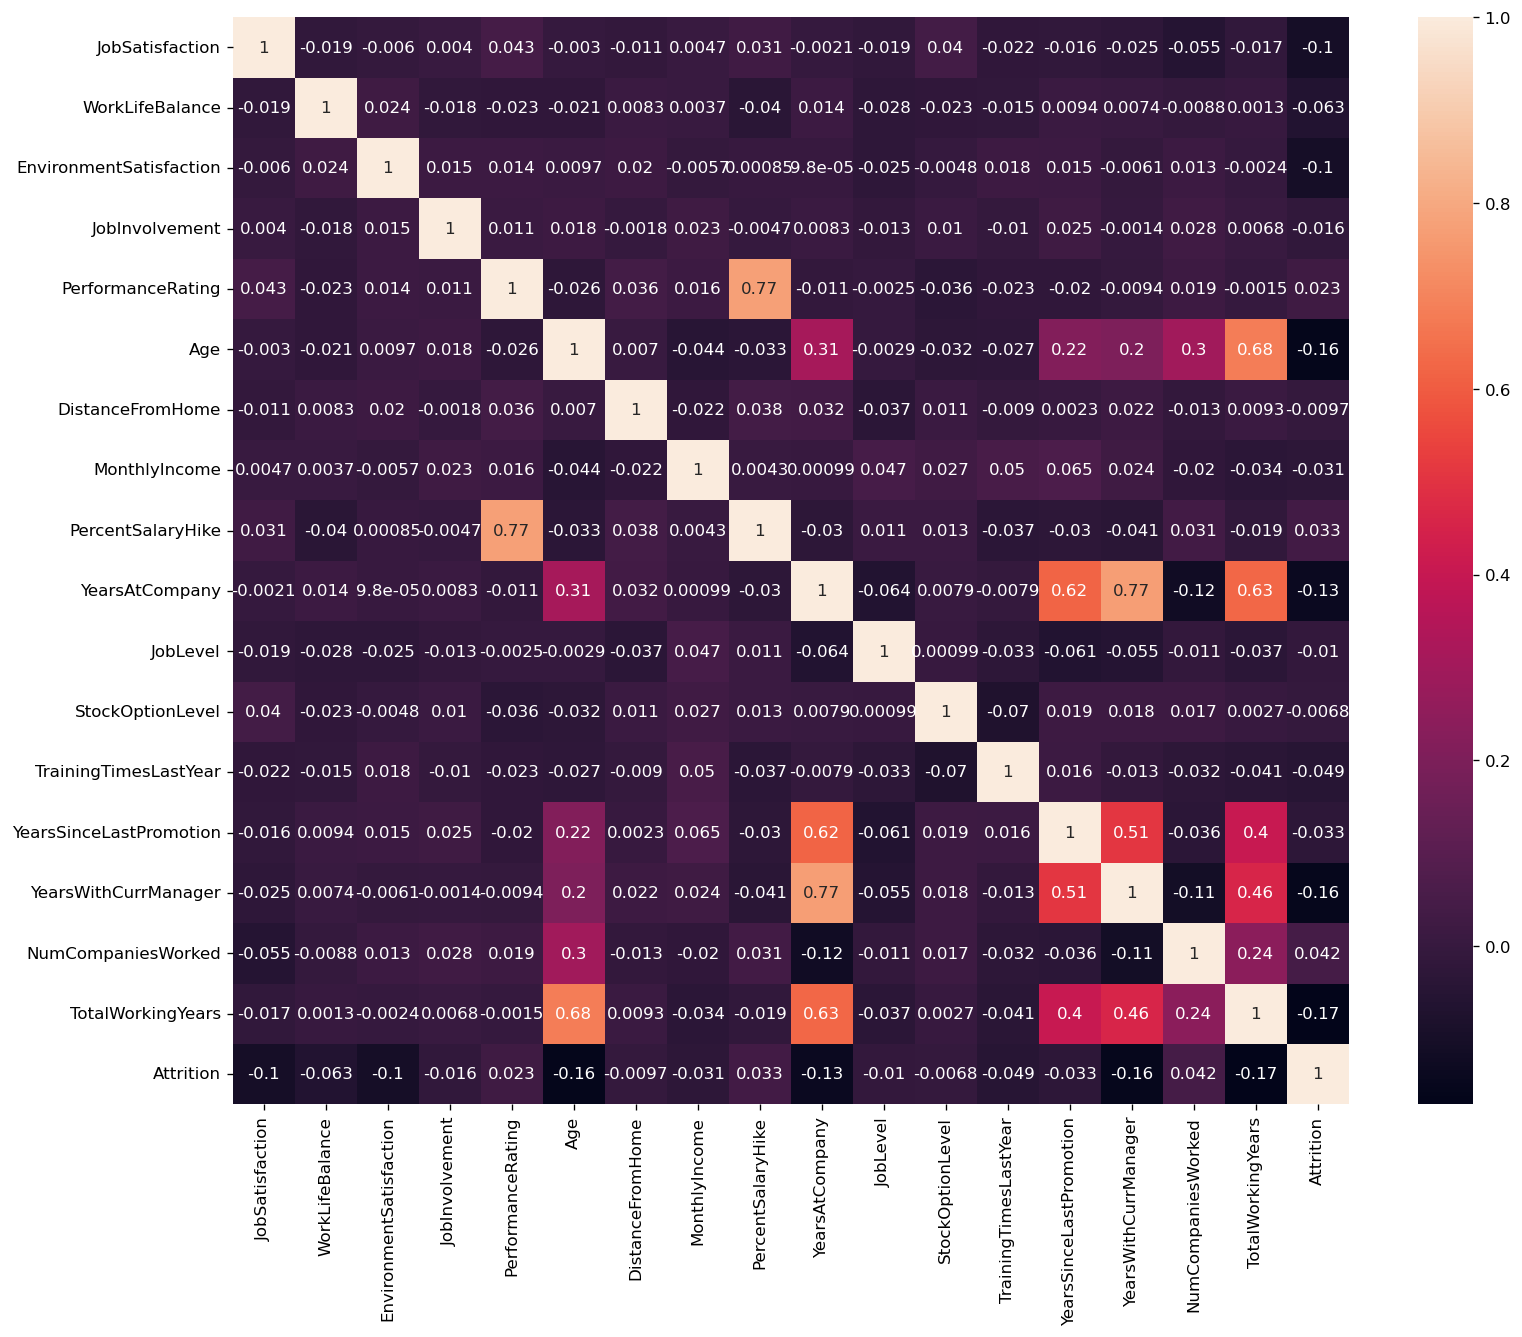

In [206]:
#mapa de calor con correlaciones
figure(figsize=(15, 12), dpi=120);
sns.heatmap(df40.corr(), annot = True);

In [158]:
#Correlación de variables
df_general1 = df_general[['Age','BusinessTravel','Department', 'DistanceFromHome', 'EmployeeID','JobRole','MonthlyIncome', 'PercentSalaryHike', 'YearsAtCompany' ]]
df = pd.merge(df_employee_s, df_manager_s, on = 'EmployeeID', how='left')
df = pd.merge(df, df_general1, on = 'EmployeeID', how='left')
df1 = df.dropna()
df2 = pd.merge(df_retirement, df1, on = 'EmployeeID', how='left')
df2 = df2.dropna()
df2 = df2.reset_index().drop('index', axis=1)
df2= df2.astype({'EnvironmentSatisfaction' : int })
df2= df2.astype({'JobSatisfaction' : int })
df2= df2.astype({'WorkLifeBalance' : int })
df2= df2.astype({'JobInvolvement' : int })
df2= df2.astype({'PerformanceRating' : int })
df2= df2.astype({'Age' : int })
df2= df2.astype({'DistanceFromHome' : int })
df2= df2.astype({'MonthlyIncome' : int })
df2= df2.astype({'PercentSalaryHike' : int })
df2= df2.astype({'YearsAtCompany' : int })
df4 = pd.merge(df1, df_retirement, on = 'EmployeeID', how='left')

df4['Attrition'] = df4['Attrition'].fillna('No')
lista=['resignationReason','retirementType','retirementDate']

for i in lista: 
    df4[i]=df4[i].fillna('No applicable')

df4= df4.astype({'DistanceFromHome' : int })

In [55]:
df4['DistanceFromHome'] = df4['DistanceFromHome'].apply(lambda x: "Very close" if (x >=0) & (x <=5) else "Near" if (x >=6) & (x <=10) else "in between" if (x >=11) & (x <=20) else "Far")
df4['MonthlyIncome'] = df4['MonthlyIncome'].apply(lambda x: "Low" if (x >=0) & (x <=28210) else "Medium" if (x >=28211) & (x <=46800) else "Medium high" if (x >=46801) & (x <=68610) else "High" if (x >=68611) & (x <=116910) else "Very high")
df4['YearsAtCompany'] = df4['YearsAtCompany'].apply(lambda x: "G1" if (x >=0) & (x <=2) else "G2" if (x >=3) & (x <=5) else "G3" if (x >=6) & (x <=10) else "G4" if (x >=11) & (x <=20) else "G5")
df4['Age'] = df4['Age'].apply(lambda x: "G1" if (x >=19) & (x <=25) else "G2" if (x >=26) & (x <=30) else "G3" if (x >=31) & (x <=35) else "G4" if (x >=36) & (x <=40) else "G5")
df4['PercentSalaryHike'] = df4['PercentSalaryHike'].apply(lambda x: "Low" if (x >=11) & (x <=15) else "Medium" if (x >=16) & (x <=20) else "High" )

In [56]:
df5 = df4.drop(['EmployeeID','retirementDate','EnvironmentSatisfaction',	'JobSatisfaction',	'WorkLifeBalance',	'JobInvolvement', 'PerformanceRating', 'Department', 'JobRole', 'resignationReason','PercentSalaryHike', 'MonthlyIncome'], axis = 1)
df_dummies1 = pd.get_dummies(df5)
df_dummies1 =df_dummies1.drop(['retirementType_No applicable','Attrition_No'],axis = 1)
df_dummies2 = df_dummies1[['Age_G1', 'Age_G2', 'Age_G3', 'Age_G4', 'Age_G5','BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently','BusinessTravel_Travel_Rarely',  'Attrition_Yes', 'retirementType_Fired', 'retirementType_Resignation']]
df_dummies3 = df_dummies1[['DistanceFromHome_Far',
       'DistanceFromHome_Near', 'DistanceFromHome_Very close',
       'DistanceFromHome_in between', 'YearsAtCompany_G1', 'YearsAtCompany_G2',
       'YearsAtCompany_G3', 'YearsAtCompany_G4', 'YearsAtCompany_G5',
       'Attrition_Yes', 'retirementType_Fired', 'retirementType_Resignation']]


In [57]:
df_dummies2.corr()


,Age_G1,Age_G2,Age_G3,Age_G4,Age_G5,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Attrition_Yes,retirementType_Fired,retirementType_Resignation
Age_G1,1.000000,-0.136745,-0.162189,-0.140743,-0.201974,-0.022414,-0.044386,0.053175,0.149366,0.077865,0.128044
Age_G2,-0.136745,1.000000,-0.257492,-0.223444,-0.320654,-0.025022,0.007301,0.010420,0.059461,0.007268,0.059493
Age_G3,-0.162189,-0.257492,1.000000,-0.265021,-0.380319,0.009172,0.050224,-0.049361,0.020001,0.020069,0.013683
Age_G4,-0.140743,-0.223444,-0.265021,1.000000,-0.330030,0.027022,-0.000403,-0.017693,-0.090657,-0.023984,-0.086073
Age_G5,-0.201974,-0.320654,-0.380319,-0.330030,1.000000,0.002606,-0.025494,0.020208,-0.077609,-0.049179,-0.063399
BusinessTravel_Non-Travel,-0.022414,-0.025022,0.009172,0.027022,0.002606,1.000000,-0.162529,-0.527682,-0.073200,-0.019178,-0.069566
BusinessTravel_Travel_Frequently,-0.044386,0.007301,0.050224,-0.000403,-0.025494,-0.162529,1.000000,-0.752383,0.110314,0.032117,0.103683
BusinessTravel_Travel_Rarely,0.053175,0.010420,-0.049361,-0.017693,0.020208,-0.527682,-0.752383,1.000000,-0.046100,-0.014846,-0.042817
Attrition_Yes,0.149366,0.059461,0.020001,-0.090657,-0.077609,-0.073200,0.110314,-0.046100,1.000000,0.292981,0.939229
retirementType_Fired,0.077865,0.007268,0.020069,-0.023984,-0.049179,-0.019178,0.032117,-0.014846,0.292981,1.000000,-0.053051


In [58]:
df_dummies3.corr()

,DistanceFromHome_Far,DistanceFromHome_Near,DistanceFromHome_Very close,DistanceFromHome_in between,YearsAtCompany_G1,YearsAtCompany_G2,YearsAtCompany_G3,YearsAtCompany_G4,YearsAtCompany_G5,Attrition_Yes,retirementType_Fired,retirementType_Resignation
DistanceFromHome_Far,1.000000,-0.243097,-0.345905,-0.177418,-0.032125,0.019239,0.001310,0.014766,-0.003330,-0.034529,-0.019472,-0.029072
DistanceFromHome_Near,-0.243097,1.000000,-0.525661,-0.269616,0.012244,0.018096,-0.012894,-0.010277,-0.019782,0.009269,0.000481,0.009508
DistanceFromHome_Very close,-0.345905,-0.525661,1.000000,-0.383639,0.033069,-0.047339,0.036953,-0.014228,-0.022242,-0.003059,0.018744,-0.009924
DistanceFromHome_in between,-0.177418,-0.269616,-0.383639,1.000000,-0.028920,0.023626,-0.035106,0.017563,0.056475,0.025105,-0.007483,0.028907
YearsAtCompany_G1,-0.032125,0.012244,0.033069,-0.028920,1.000000,-0.356185,-0.362149,-0.205151,-0.119830,0.208814,0.073315,0.191767
YearsAtCompany_G2,0.019239,0.018096,-0.047339,0.023626,-0.356185,1.000000,-0.429023,-0.243033,-0.141958,-0.043200,-0.011152,-0.041115
YearsAtCompany_G3,0.001310,-0.012894,0.036953,-0.035106,-0.362149,-0.429023,1.000000,-0.247102,-0.144334,-0.070182,-0.041003,-0.058578
YearsAtCompany_G4,0.014766,-0.010277,-0.014228,0.017563,-0.205151,-0.243033,-0.247102,1.000000,-0.081763,-0.094976,-0.025731,-0.089957
YearsAtCompany_G5,-0.003330,-0.019782,-0.022242,0.056475,-0.119830,-0.141958,-0.144334,-0.081763,1.000000,-0.023259,0.007131,-0.026853
Attrition_Yes,-0.034529,0.009269,-0.003059,0.025105,0.208814,-0.043200,-0.070182,-0.094976,-0.023259,1.000000,0.292981,0.939229


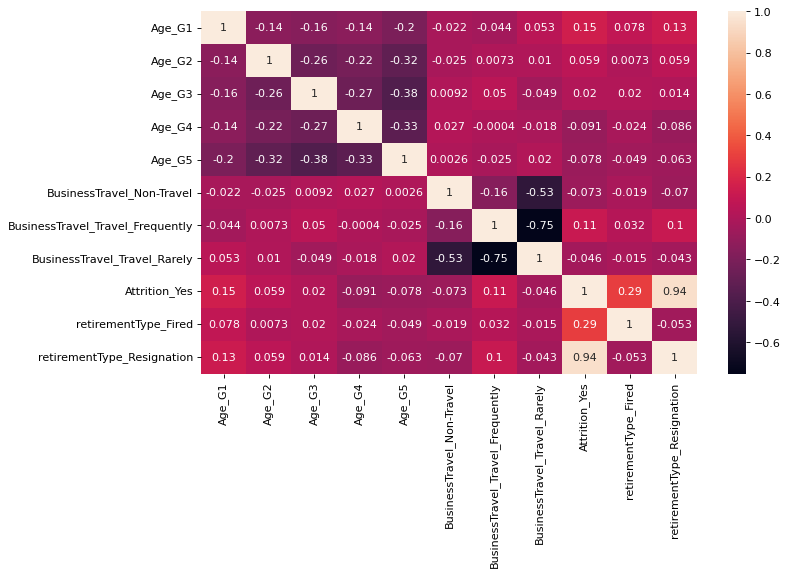

In [59]:
#Correlación de las variables Age,BusinessTravel,Attrition,retirementType 
figure(figsize=(10, 6), dpi=80);
sns.heatmap(df_dummies2.corr(), annot = True);

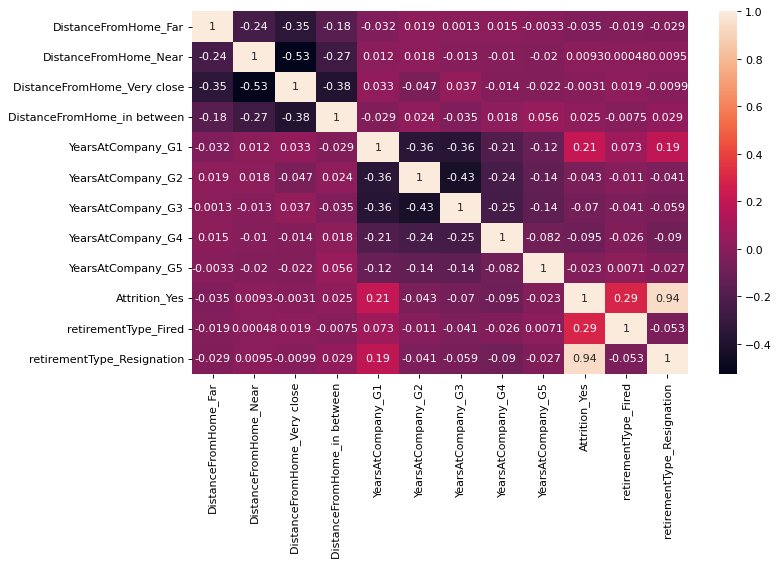

In [60]:
#Correlación de las variables DistanceFromHome,YearsAtCompany,Attrition, retirementType 
from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=80);
sns.heatmap(df_dummies3.corr(), annot = True);

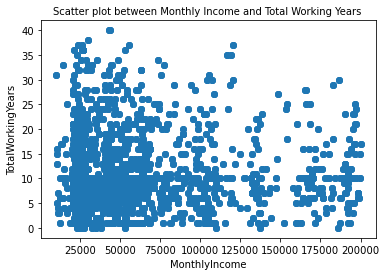

In [156]:
#¿existe alguna relación entre los ingresos mensuales y el total de años trabajados? 
plt.scatter(x = df_general['MonthlyIncome'], y =  df_general['TotalWorkingYears'])
plt.xlabel('MonthlyIncome',fontsize=10)
plt.ylabel('TotalWorkingYears',fontsize=10)
plt.title('Scatter plot between Monthly Income and Total Working Years ', fontsize=10);

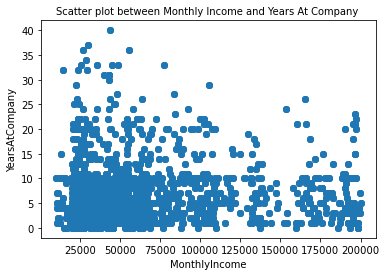

In [157]:

#¿existe alguna relación entre los ingresos mensuales y el total de años en la empresa? 
plt.scatter(x = df_general['MonthlyIncome'], y =  df_general['YearsAtCompany'])
plt.xlabel('MonthlyIncome',fontsize=10)
plt.ylabel('YearsAtCompany',fontsize=10)
plt.title('Scatter plot between Monthly Income and Years At Company ', fontsize=10);

<AxesSubplot:title={'center':'MonthlyIncome'}, xlabel='Attrition'>

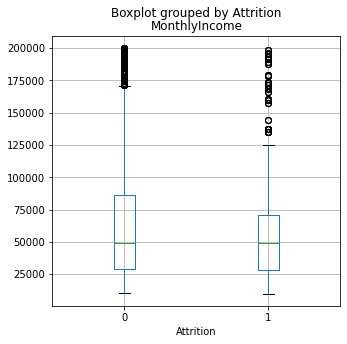

In [231]:
df40.boxplot("MonthlyIncome", "Attrition", figsize=(5,5))

<AxesSubplot:title={'center':'PercentSalaryHike'}, xlabel='Attrition'>

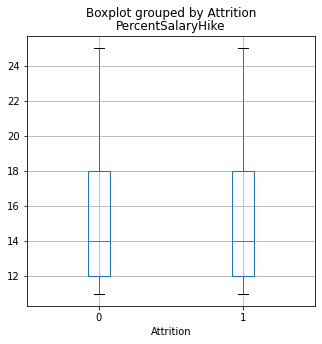

In [232]:
df40.boxplot("PercentSalaryHike", "Attrition", figsize=(5,5))

<AxesSubplot:title={'center':'YearsSinceLastPromotion'}, xlabel='Attrition'>

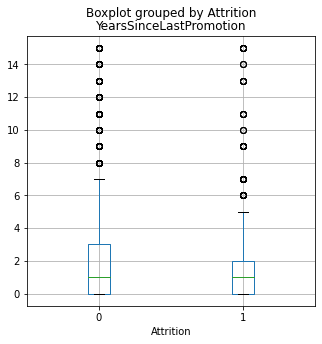

In [233]:
df40.boxplot("YearsSinceLastPromotion", "Attrition", figsize=(5,5))


<AxesSubplot:title={'center':'NumCompaniesWorked'}, xlabel='Attrition'>

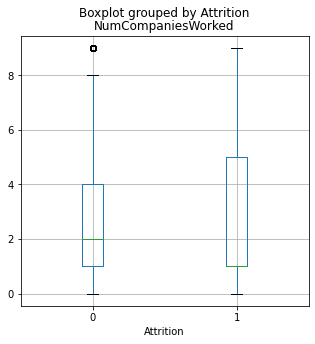

In [234]:
df40.boxplot("NumCompaniesWorked", "Attrition", figsize=(5,5))


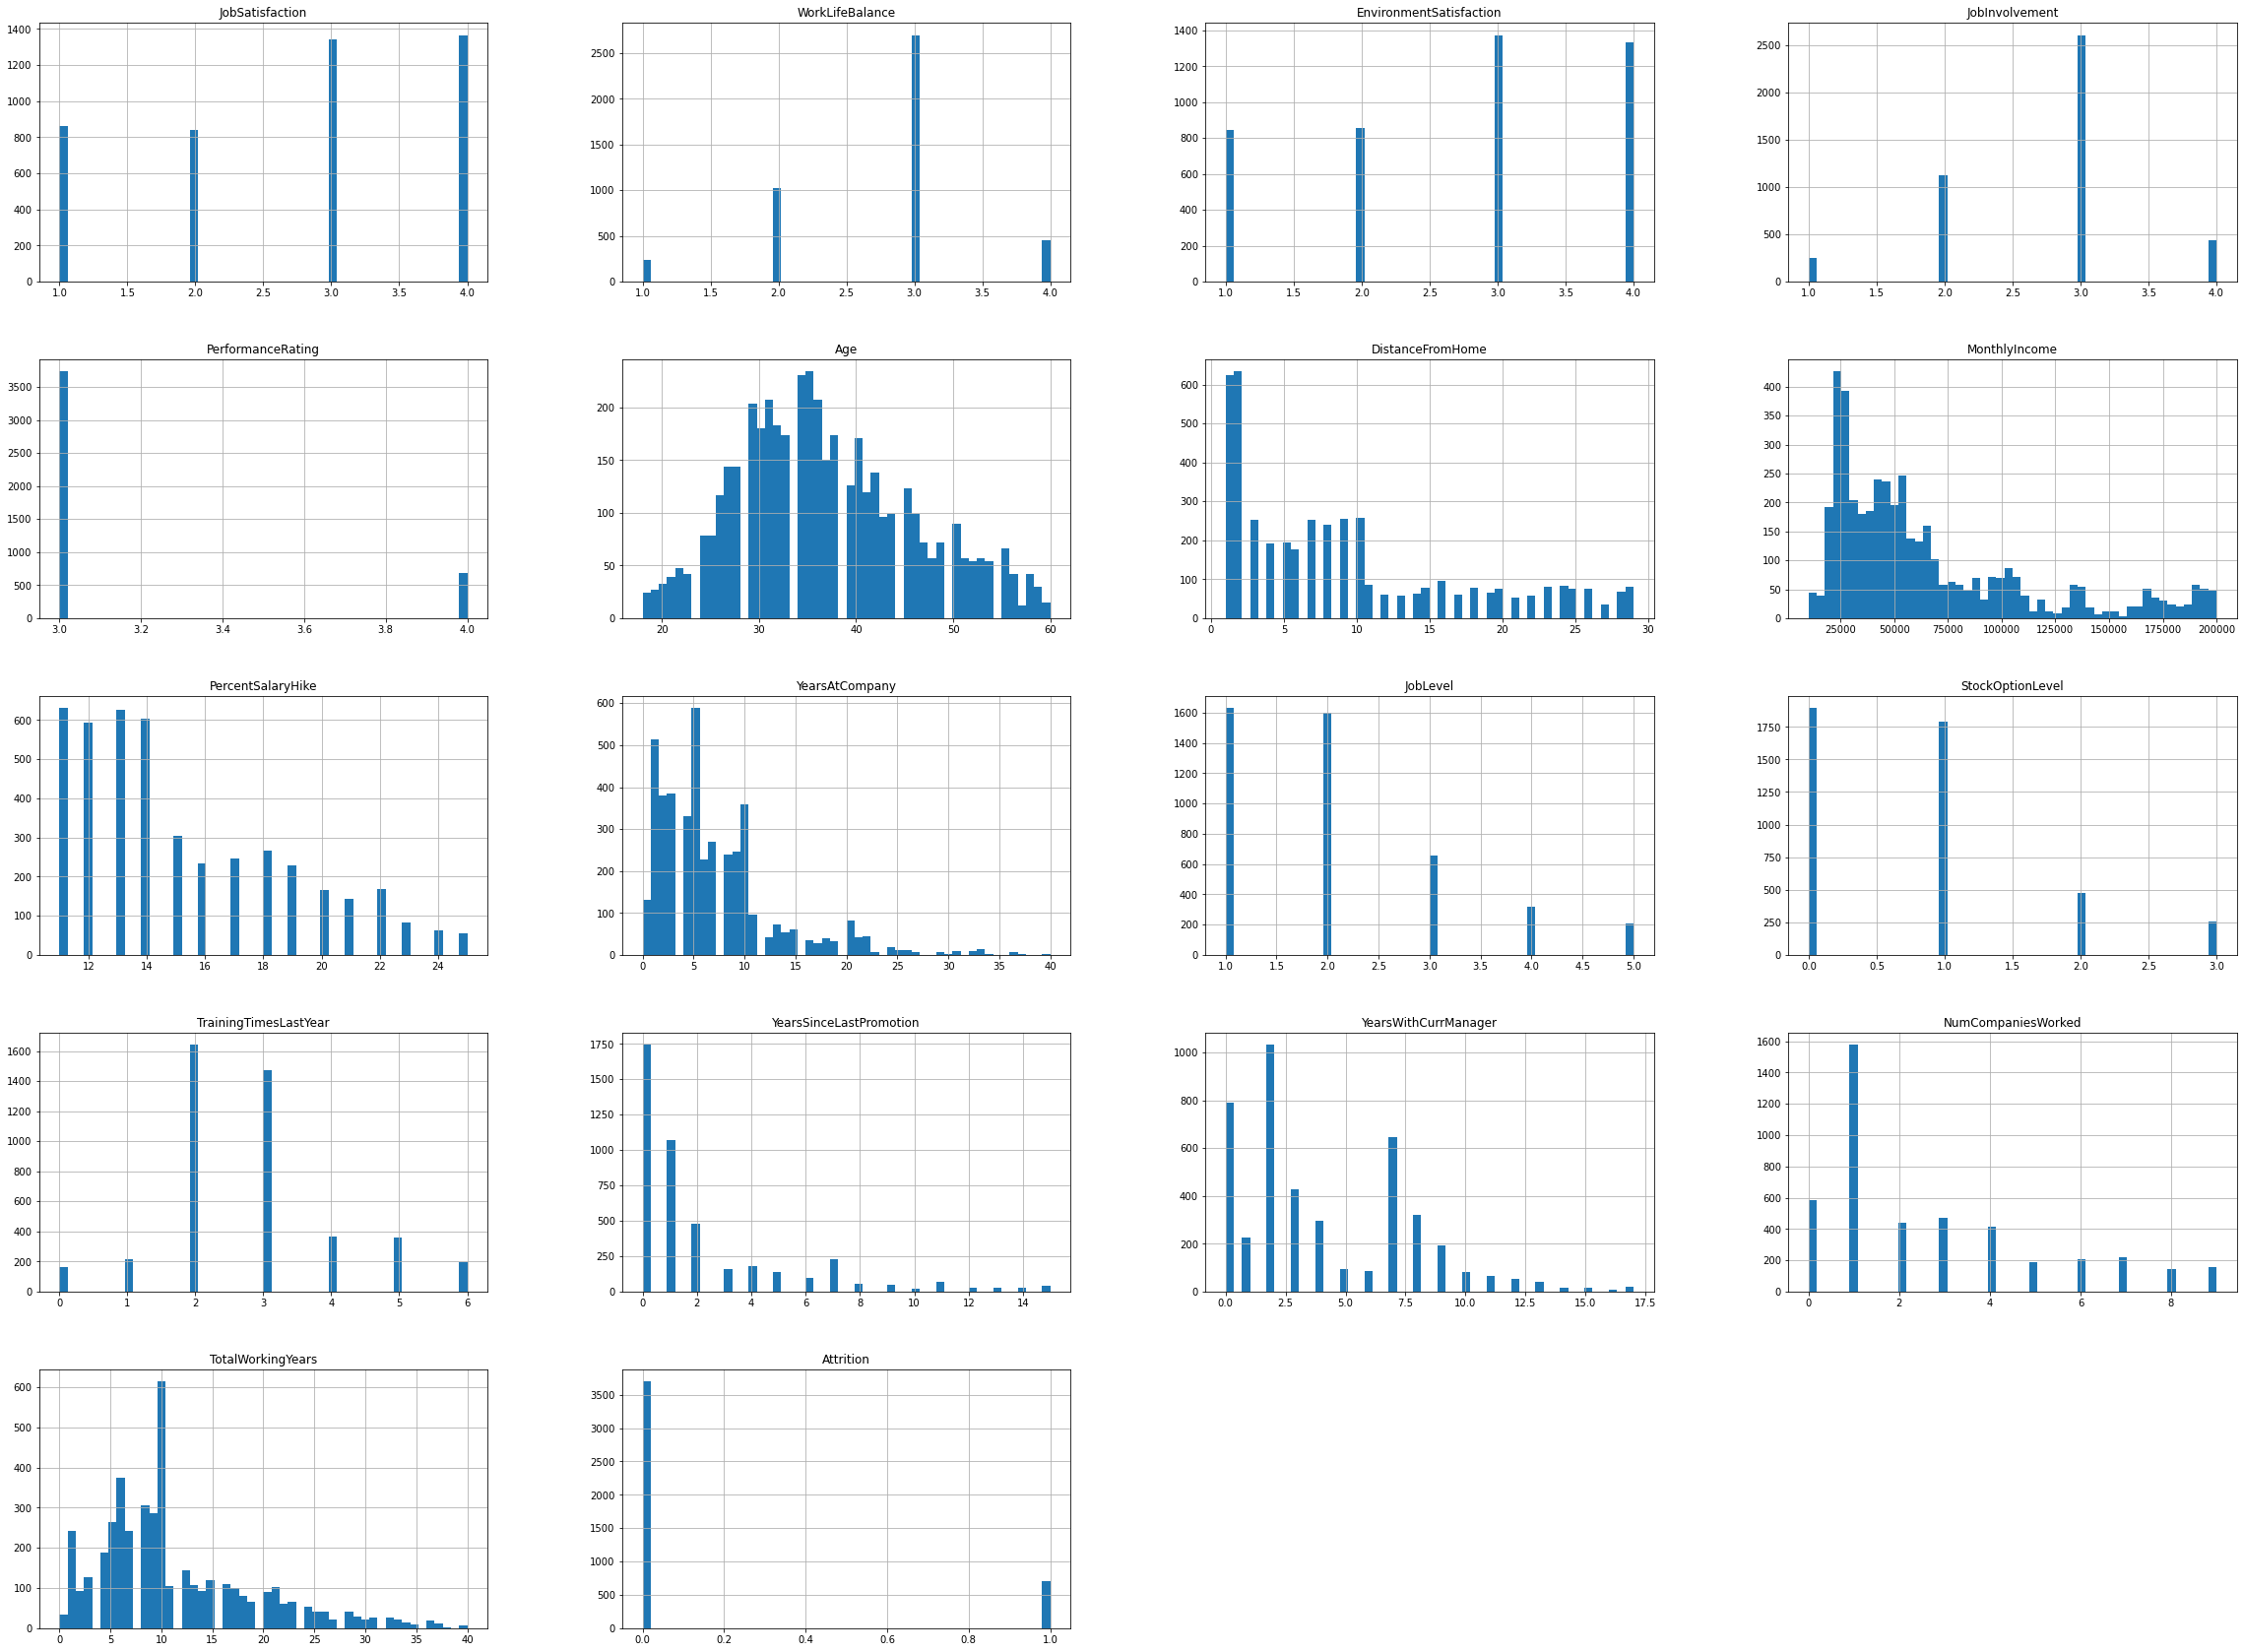

In [235]:
df40.hist(bins=50, figsize=(40,30))
plt.show()

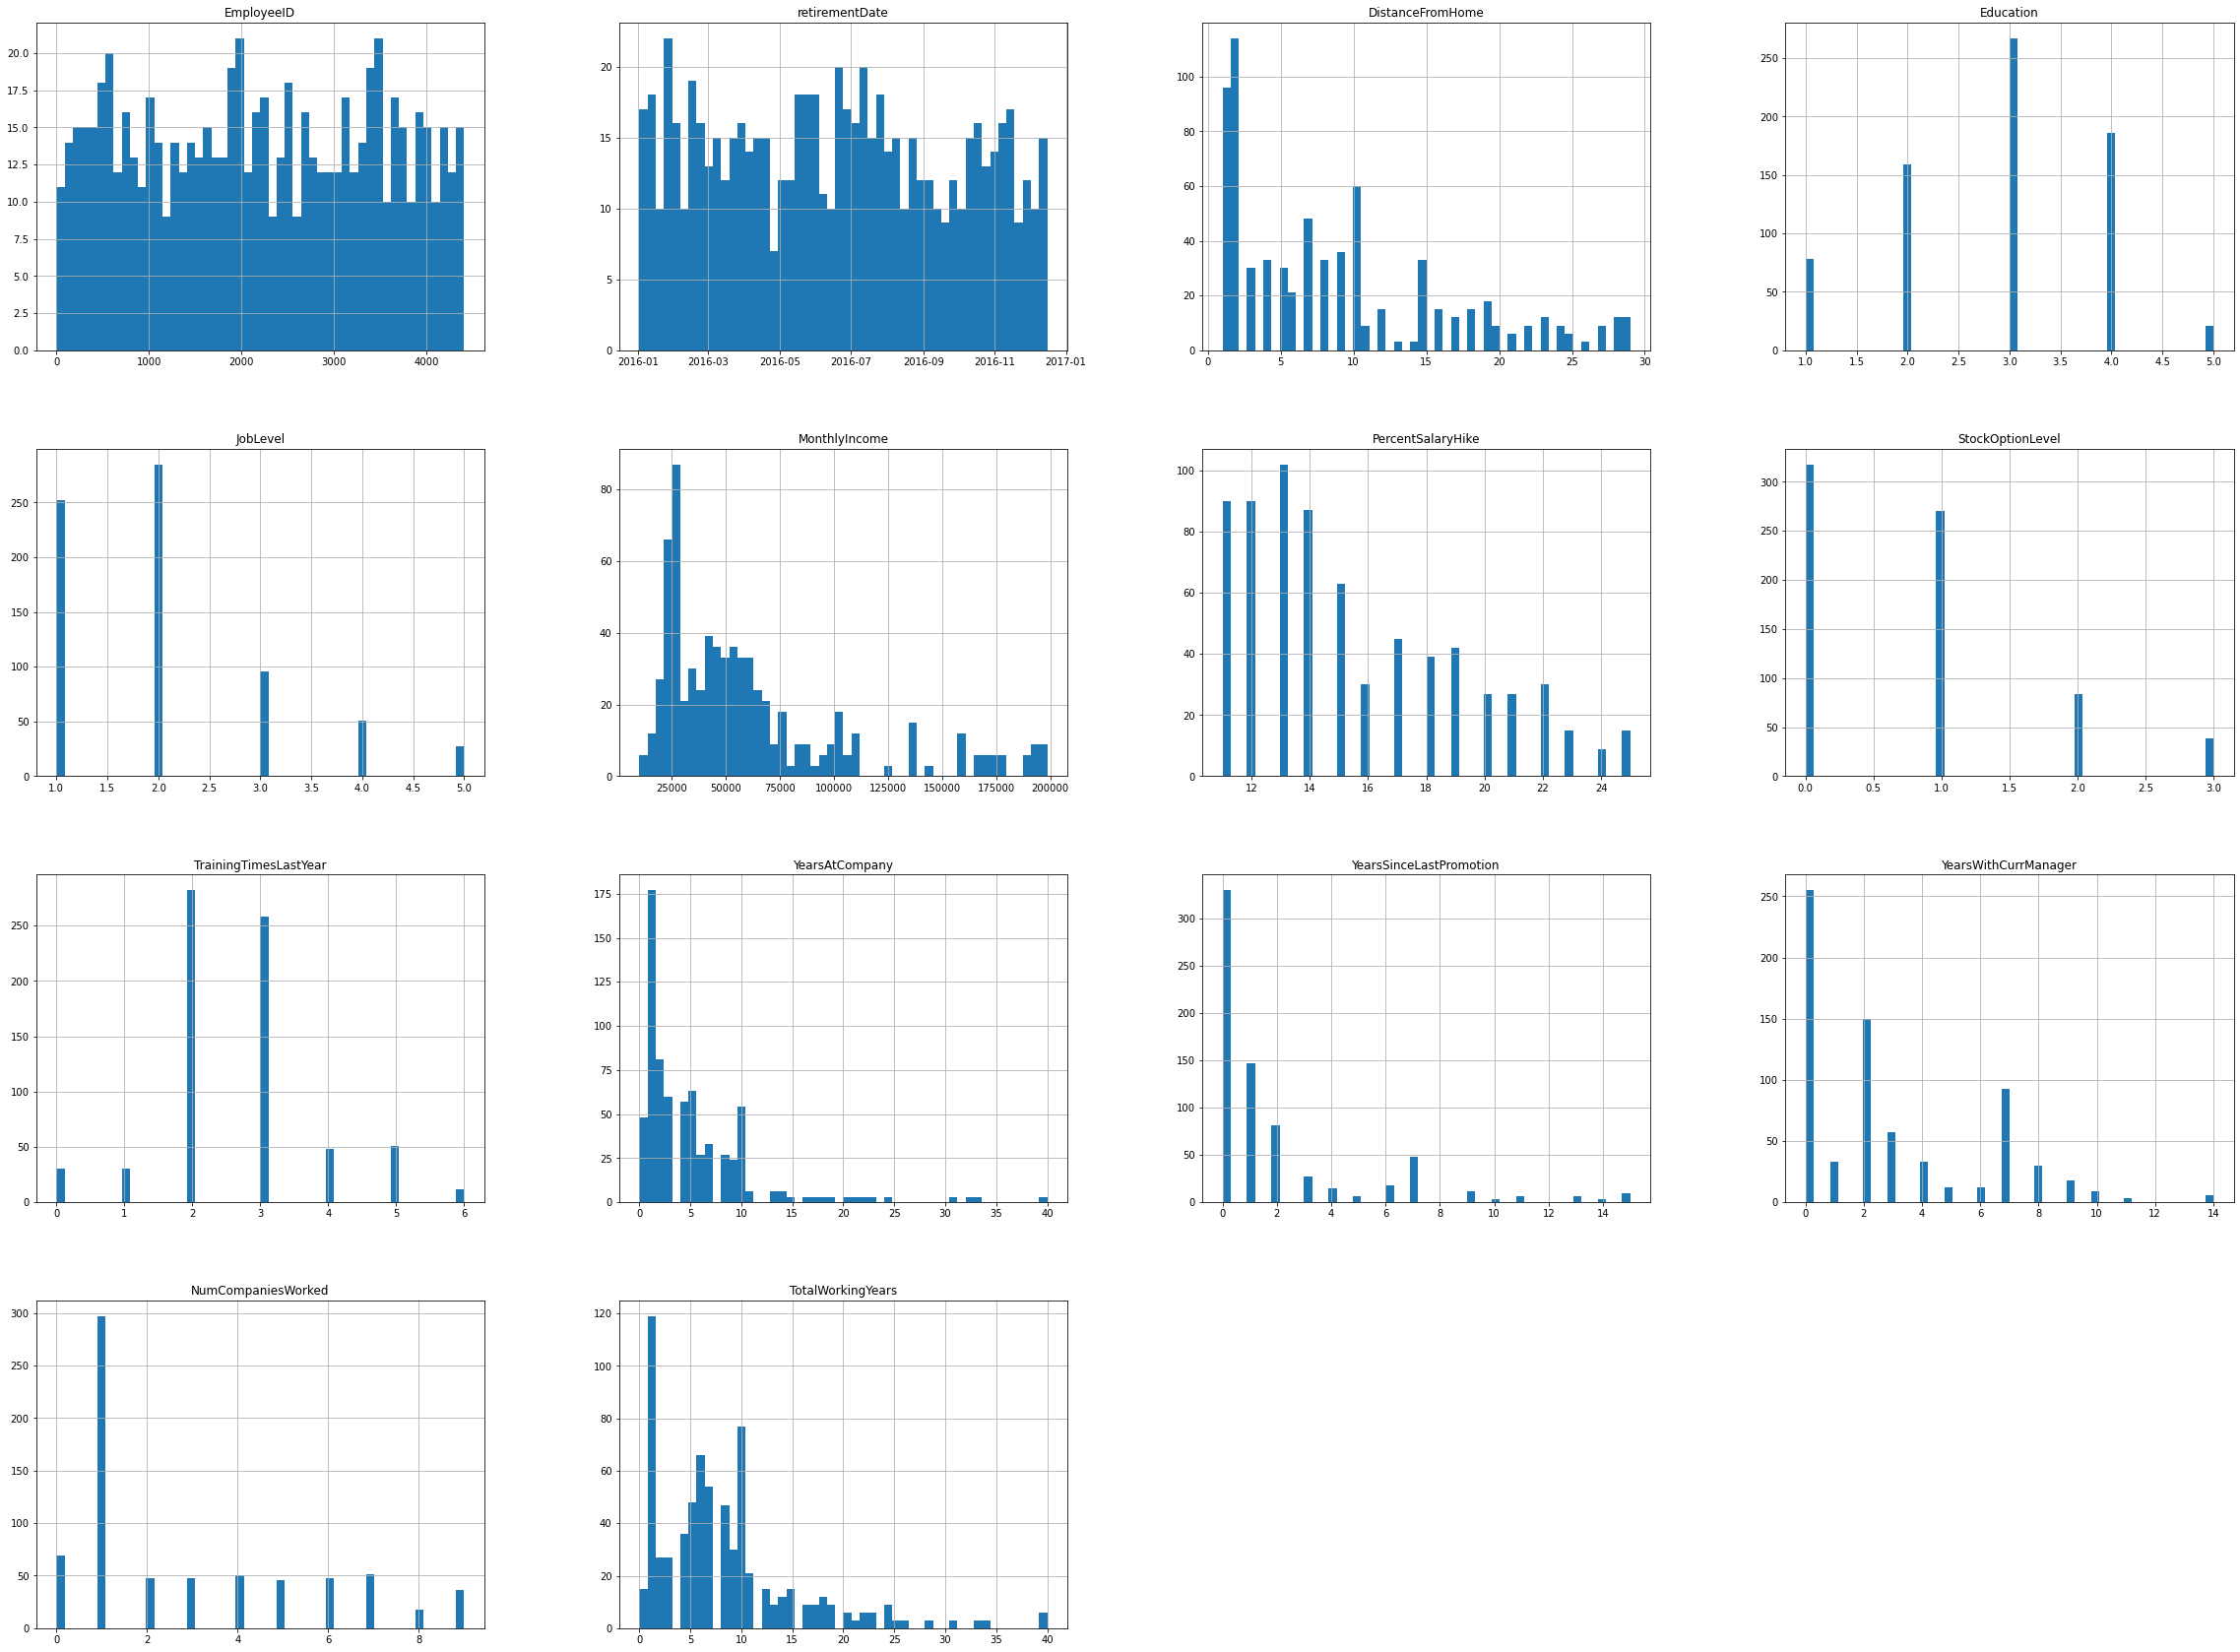

In [237]:
df_GR_groups.hist(bins=50, figsize=(40,30))
plt.show()